In [1]:
import gzip
import pickle 
import mplhep as hep
hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=15)
import numpy as np
import torch 
import dgl
import pandas as pd
import numpy as np
import plotly.express as px
import sys
sys.path.append("/afs/cern.ch/work/m/mgarciam/private/mlpf/")
from sklearn.cluster import DBSCAN
#from torch_scatter import scatter_max, scatter_add, scatter_mean
# from src.layers.inference_oc import get_clustering, obtain_intersection_values
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_ML_gt = "showers_df_evaluation/0_0_None_hdbscan.pt"
path_pandora = "showers_df_evaluation/0_0_None_pandora.pt"


path_ML = "showers_df_evaluation/0_0_None_hdbscan_delta_MC02.pt"
path_pandora = "showers_df_evaluation/0_0_None_pandora.pt"


dir_top = "/eos/user/g/gkrzmanc/results/2024/test_1311_additional_features_150files_model_epoch_4_step_50000/"
import os 
from src.evaluation.refactor.preprocess import preprocess_dataframe
from src.utils.inference.pandas_helpers import open_hgcal, open_mlpf_dataframe
path_ml = os.path.join(dir_top, path_ML)
path_ml_gt = os.path.join(dir_top, path_ML_gt)
sd_hgb, _ = open_mlpf_dataframe(path_ml, False)
sd_hgb_gt, _ = open_mlpf_dataframe(path_ml_gt, False)
sd_pandora, _ = open_mlpf_dataframe(os.path.join(dir_top, path_pandora), False)
sd_hgb, sd_pandora = preprocess_dataframe(sd_hgb, sd_pandora, "")
sd_hgb_gt, sd_pandora = preprocess_dataframe(sd_hgb_gt, sd_pandora, "")

# id_group = [211, -211, -13, 13, 2212, -2212, 321, -321, 3222, 3112, 3224, -3112, -3224]
# mask = (sd_hgb.true_showers_E >5)*(sd_hgb.pid.isin(id_group))*np.isnan(sd_hgb.pred_showers_E)
# sd_hgb = sd_hgb[~mask]


/afs/cern.ch/work/m/mgarciam/private/mlpf/src/evaluation/refactor/preprocess.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.number_batch = new_batch_idx


In [3]:
from src.utils.inference.event_metrics import get_response_for_event_energy

perfect_pid=False
mass_zero=False
ML_pid=True
matched_all = {"ML": sd_hgb, "ML GTC": sd_hgb_gt}
matched_pandora = sd_pandora
event_res_dic = {} 
for key in matched_all:
        matched_ = matched_all[key]
        event_res_dic[key] = get_response_for_event_energy(
                matched_pandora, matched_, perfect_pid=perfect_pid, mass_zero=mass_zero, ML_pid=ML_pid
            )
# old_font_size = matplotlib.rcParams['font.size']
# matplotlib.rcParams.update({'font.size': 30})



/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:159: RuntimeWarning: invalid value encountered in divide
  pred_vect /= np.linalg.norm(pred_vect, axis=1).reshape(-1, 1)
/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:160: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541990/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1646.)
  pred_vect[np.isnan(pred_vect)] = 0


Using Pandora provided PID for Pandora


/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:178: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_E_jet = scatter_sum(torch.tensor(true_e), batch_idx)
/afs/cern.ch/work/m/mgarciam/private/mlpf/src/utils/inference/event_metrics.py:179: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred_E_jet = scatter_sum(torch.tensor(pred_E), batch_idx)


84988
Using Pandora provided PID for Pandora
0


In [17]:
counts

array([0.00000000e+00, 0.00000000e+00, 3.47222222e-03, 1.04166667e-02,
       6.94444444e-03, 3.47222222e-03, 3.47222222e-03, 1.04166667e-02,
       3.47222222e-03, 0.00000000e+00, 6.94444444e-03, 3.47222222e-03,
       1.04166667e-02, 1.04166667e-02, 1.38888889e-02, 3.12500000e-02,
       1.38888889e-02, 2.08333333e-02, 3.12500000e-02, 2.77777778e-02,
       5.20833333e-02, 6.25000000e-02, 2.08333333e-02, 5.20833333e-02,
       5.90277778e-02, 5.90277778e-02, 5.55555556e-02, 8.33333333e-02,
       8.33333333e-02, 8.33333333e-02, 1.56250000e-01, 1.35416667e-01,
       1.66666667e-01, 1.73611111e-01, 1.70138889e-01, 2.11805556e-01,
       1.73611111e-01, 2.32638889e-01, 2.98611111e-01, 4.13194444e-01,
       3.47222222e-01, 3.88888889e-01, 5.45138889e-01, 7.46527778e-01,
       1.01388889e+00, 1.56944444e+00, 2.52430556e+00, 4.41319444e+00,
       6.77083333e+00, 8.91666667e+00, 7.48611111e+00, 4.63888889e+00,
       2.74652778e+00, 1.46527778e+00, 9.16666667e-01, 5.79861111e-01,
      

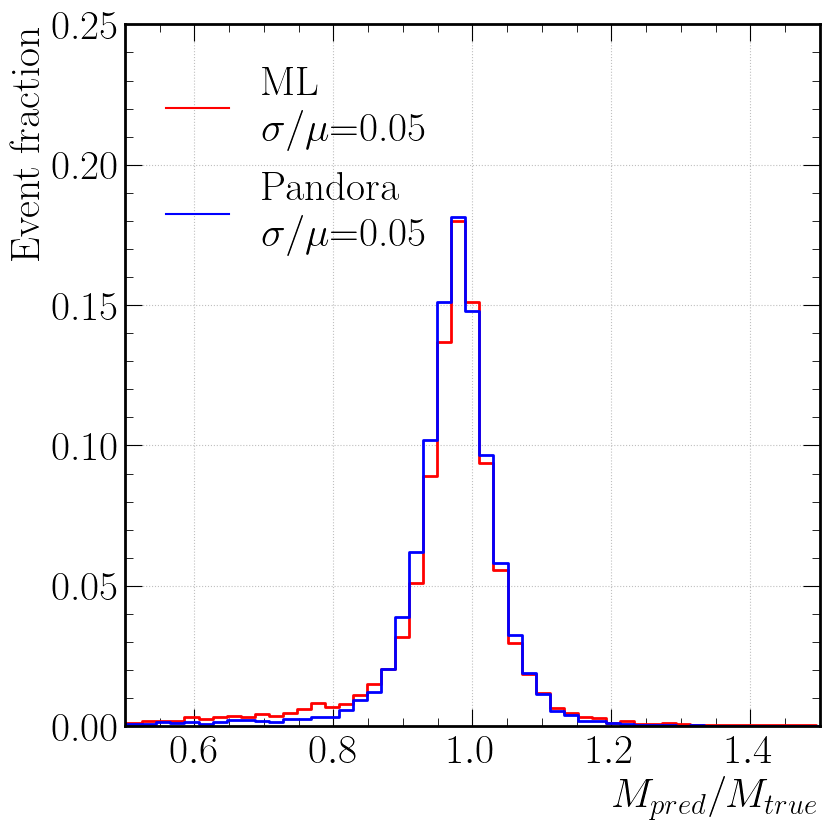

In [26]:
fig= plt.figure( figsize=(9,9))
ax = fig.add_subplot(111)
# set fontsize to 20
ax.set_xlabel(r"$M_{pred}/M_{true}$")
bins = np.linspace(0, 2, 100)


counts, bins = np.histogram(event_res_dic["ML"]["mass_over_true_model"], bins=bins,density=True)  # Dice outcomes: 1 to 6
bin_width = 0.02020202
# Normalize the counts so they sum to 1
probabilities = counts*bin_width

# Plot the histogram with normalized probabilities
ax.step(bins[:-1], probabilities, linewidth=2,color="red")


counts, bins = np.histogram(event_res_dic["ML"]["mass_over_true_pandora"], bins=bins,density=True)  # Dice outcomes: 1 to 6
bin_width = 0.02020202
# Normalize the counts so they sum to 1
probabilities = counts*bin_width

# Plot the histogram with normalized probabilities
ax.step(bins[:-1], probabilities, linewidth=2,color="blue")


# counts, bins, patches = ax.hist(
#     event_res_dic["ML"]["mass_over_true_model"],
#     bins=bins,
#     histtype="step",
#     label="ML "+"\n"+"$\sigma/\mu$={}".format(round((event_res_dic["ML"]["var_mass_model"]), 2),
#     ),
#     color="red",
#     density=True,
#     linewidth=2,
# )

# ax.hist(
#     event_res_dic["ML"]["mass_over_true_pandora"],
#     bins=bins,
#     histtype="step",
#     label="Pandora "+"\n"+"$\sigma/\mu$={}".format(round((event_res_dic["ML GTC"]["var_mass_pandora"]), 2),
#     ),
#     color="blue",
#     density=True,
#     linewidth=2, 
# )
ax.grid()
from matplotlib.lines import Line2D
custom_line1 = Line2D([0], [0], color="red",label="ML "+"\n"+"$\sigma/\mu$=0.05")
custom_line_pandora = Line2D([0], [0], color="blue",label="Pandora "+"\n"+"$\sigma/\mu$={}".format(round((event_res_dic["ML GTC"]["var_mass_pandora"]), 2),
    ))
ax.legend(handles=[custom_line1, custom_line_pandora],loc='upper left')
# ax.legend(loc='upper left')
ax.set_xlim([0.5, 1.5])
ax.set_ylim([0, 0.25])
ax.set_ylabel("Event fraction")
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
size_font=30
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 30

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

fig.tight_layout()
fig.savefig(os.path.join("/afs/cern.ch/work/m/mgarciam/private/mlpf/notebooks/", "mass_resolution_comp.pdf"), bbox_inches="tight")

In [6]:
bins

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [14]:
0.02020202*8+0.02020202*7+0.02020202*6+0.02020202*5+2*0.02020202*2.5+2*0.02020202*1.5

0.68686868

In [7]:
in_width = bins[1] - bins[0]

# Check if the sum of heights * bin width equals 1
bin_width = 0.02020202
area = np.sum(counts * bin_width)
print(f"Total area under the histogram: {area}")

Total area under the histogram: 0.9999999899999995


In [12]:
np.sort(counts)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.47222222e-03, 3.47222222e-03, 3.47222222e-03,
       3.47222222e-03, 3.47222222e-03, 3.47222222e-03, 3.47222222e-03,
       3.47222222e-03, 3.47222222e-03, 3.47222222e-03, 3.47222222e-03,
       3.47222222e-03, 3.47222222e-03, 3.47222222e-03, 3.47222222e-03,
       6.94444444e-03, 6.94444444e-03, 6.94444444e-03, 6.94444444e-03,
       6.94444444e-03, 6.94444444e-03, 6.94444444e-03, 6.94444444e-03,
       6.94444444e-03, 6.94444444e-03, 1.04166667e-02, 1.04166667e-02,
       1.04166667e-02, 1.04166667e-02, 1.04166667e-02, 1.38888889e-02,
       1.38888889e-02, 1.38888889e-02, 1.38888889e-02, 1.38888889e-02,
       1.38888889e-02, 1.38888889e-02, 1.73611111e-02, 1.73611111e-02,
       1.73611111e-02, 1.73611111e-02, 1.73611111e-02, 1.73611111e-02,
       2.08333333e-02, 2.08333333e-02, 2.08333333e-02, 2.77777778e-02,
       3.12500000e-02, 3.12500000e-02, 3.47222222e-02, 4.16666667e-02,
      

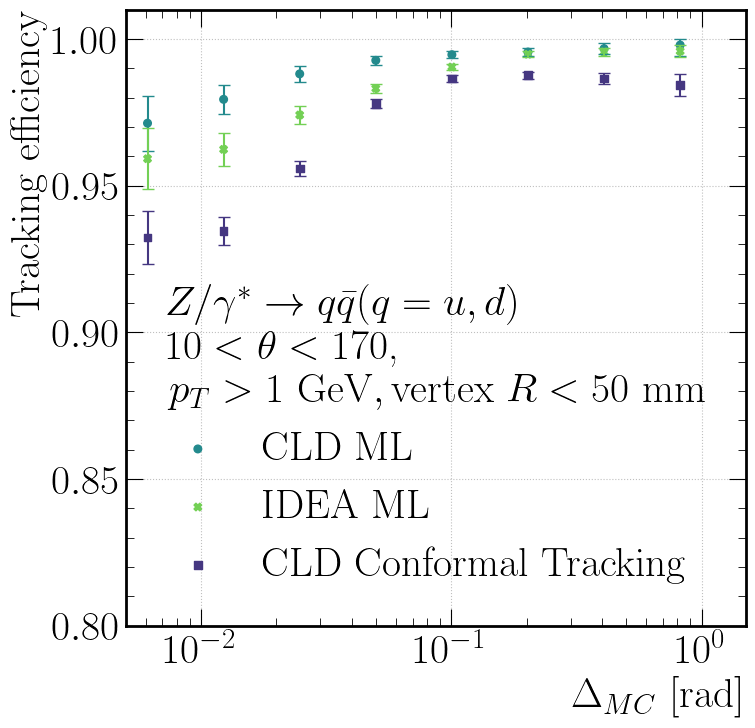

In [12]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8,8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = [ "b", "g","r"]
marker = [ "o", "<", '.']

colors = [ "#238A8DFF", "#73D055FF","#453781FF", "#FDE725FF"]
marker = [ "o", "X","s", "D"]
# labels = ["CLD Conformal Tracking", "GCLD GTF", "IDEA GGTF"]
# dataframe_list = [eff_dict_ct, eff_dict_ml, all_particles_dc]
labels = [ "CLD ML", "IDEA ML","CLD Conformal Tracking"]
dataframe_list = [eff_dict_ml, all_particles_dc, eff_dict_ct]
i =0 
log = True
plt.xlabel(r"$\Delta_{MC}$ [rad]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["delta_MC_values"]),
        np.array(dataframe_list[i]["eff_delta_MC"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff_delta_MC"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors_delta_mc"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff_delta_MC"]), np.array(error_y), upper_limit=1)
    plt.errorbar(dataframe_list[i]["delta_MC_values"], dataframe_list[i]["eff_delta_MC"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)


# plt.title("CLD")
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r'$10< \theta< 170$,' "\n" r"$p_T>1 \textrm{ GeV}, \textrm{vertex } R<50 \textrm{ mm}$")
plt.xscale("log")
# ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
# ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
# ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(True)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([5*1e-3,1.5])
plt.ylim([0.8,1.01])
size_font=30
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 30
leg = ax.get_legend()
leg._legend_box.align = "left"
import os 
PATH_store = "/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/notebook/"
fig.savefig(
            os.path.join(PATH_store, "Tracking_efficiency_comparison_IDEA_CLD_Zjj.pdf"),
            bbox_inches="tight",
        )

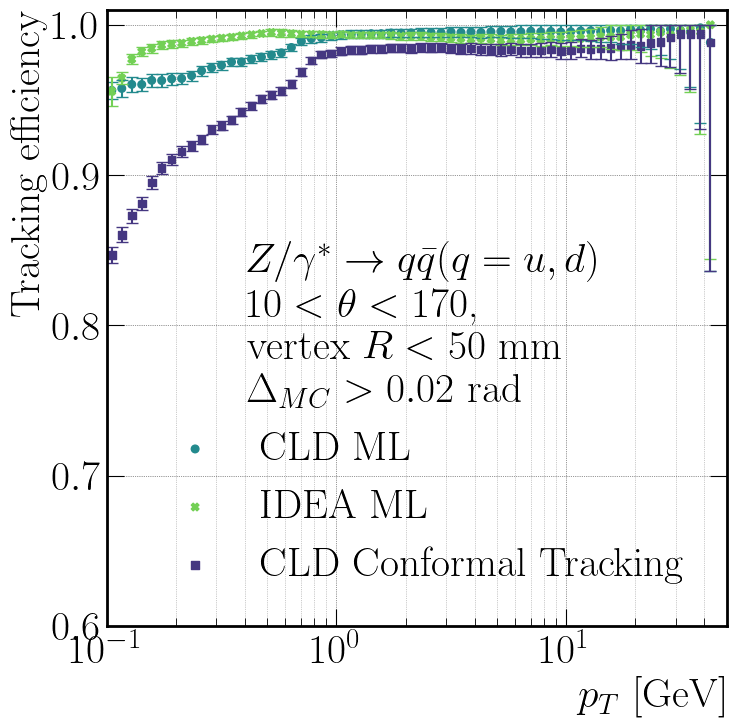

In [13]:
def limit_error_bars(y, yerr, upper_limit=1):
    yerr_upper = np.minimum(y + yerr, upper_limit) - y
    yerr_lower = yerr  # Lower error bars remain unchanged
    return yerr_lower, yerr_upper
fig= plt.figure( figsize=(8,8))
axs = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = [ "b", "g","r"]
marker = [ "o", "<", '.']
colors = [ "#238A8DFF", "#73D055FF","#453781FF", "#FDE725FF"]
marker = [ "o", "X","s", "D"]
labels = [ "CLD ML", "IDEA ML","CLD Conformal Tracking"]
dataframe_list = [eff_dict_ml, all_particles_dc, eff_dict_ct]
i =0 
plot_title =""
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    axs.scatter(
        dataframe_list[i]["energy_eff"],
        dataframe_list[i]["eff"],
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff"]), np.array(error_y), upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)

    # axs.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] , xerr=dataframe_list[i]["size_energy_bin"]/2,yerr= dataframe_list[i]["errors"], linestyle='none')

if log:
    log_ = "log"
    axs.set_xscale("log")
else:
    log_ = ""
axs.set_ylim([0.7, 1.01])
# axs.legend(loc="lower left")

# axs.axvline(x=0.7, linestyle='--')
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r'$10< \theta< 170$,' "\n" r"$\textrm{vertex } R<50 \textrm{ mm}$" "\n" r"$\Delta_{MC}>0.02 \textrm{ rad}$")


axs.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
axs.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
axs.yaxis.set_major_locator(plt.MultipleLocator(0.1))
axs.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
axs.grid(which='major', linestyle=':', linewidth='0.5', color='black')
axs.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xlim([1e-1,50])
plt.ylim([0.6,1.01])
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
size_font = 30
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 30
fig.savefig(
            os.path.join(PATH_store, "Tracking_efficiency_vs_pt_comparison_IDEA_CLD_Zjj.pdf"),
            bbox_inches="tight",
        )
# leg._legend_box.align = "right"

In [4]:

def create_eff_dic(matched_, reco_r,reco_delta):
    df_id = matched_
    photons_dic = calculate_eff(df_id)
    photons_dic = calculate_eff_vertex(reco_r,photons_dic)
    photons_dic = calculate_eff_DeltaMC(reco_delta,photons_dic)
    return photons_dic


def calculate_eff(sd, log_scale=False):
    # if log_scale:
    bins = np.exp(np.arange(np.log(1e-1), np.log(50), 0.1))
    # else:
    #     bins = np.arange(0, 51, 2)
    #bins = [5e-3,0.1,1.80804241e-01,2.98095799e-01, 4.91476884e-01, 8.10308393e-01, 1.33597268e+00,2.20264658e+00, 3.63155027e+00, 5.98741417e+00, 9.87157710e+00,1.62754791e+01, 2.68337287e+01, 4.42413392e+01]
    bins = np.array(bins)
    eff = []
    eff_50 = []
    eff_75 = []
    energy_eff = []
    size_energy_bin = []
    errors = []
    number_of_hits = []
    number_of_hits_var = []
    total_showers_ = []
    purity = []
    purity_var = []
    number_of_hits_unique = []
    number_of_hits_var_unique = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = sd.true_showers_pt.values <= bin_i1
        mask_below = sd.true_showers_pt.values > bin_i
        # this mask takes all E that have values (does not include fakes then)
        mask = mask_below * mask_above
        number_of_non_reconstructed_showers = np.sum(
            np.isnan(sd.pred_showers_E.values)[mask]
        )
        mask_non_nan = ~np.isnan(sd.e_pred_and_truth.values)
        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            #total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>3)
            particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            more_than_4_hits = sd["pred_showers_E"][mask].values>3
            total_reconstructed_cld_crit = np.sum((sd["e_pred_and_truth"][mask].values>3)*more_than_4_hits)
            # total_reconstructed_cld_crit =  np.sum((track_purity>=0.75)*more_than_4_hits)
            #total_reconstructed_cld_crit =  np.sum((particle_purity>=0.4)*(track_purity>=0.4)*more_than_4_hits)
      

            # print(total_reconstructed_cld_crit,total_showers )
            percentage_of_hits_MC = sd["e_pred_and_truth"][mask*mask_non_nan].values/sd["reco_showers_E"][mask*mask_non_nan].values
            percentage_of_hits_MC_unique = sd["number_unique_hits_reconstructed"][mask*mask_non_nan].values/sd["number_unique_hits"][mask*mask_non_nan].values
            purity_list =  sd["e_pred_and_truth"][mask*mask_non_nan].values/sd["pred_showers_E"][mask*mask_non_nan].values
            n_t_purity =  sd["e_pred_and_truth"][mask*mask_non_nan].values
            n_f = sd["pred_showers_E"][mask*mask_non_nan].values-n_t_purity
            sigma_t_purity = np.var(n_t_purity)
            sigma_f_purity = np.var(n_f)
            error_purity = (n_f/(n_t_purity+n_f)**2*sigma_t_purity)**2+(n_t_purity*sigma_f_purity/(n_t_purity+n_f)**2)**2
            N = len(error_purity)
            purity.append(np.mean(purity_list))
            purity_var.append(1/N*(np.sqrt(np.sum(error_purity))))
            number_of_hits.append(np.mean(percentage_of_hits_MC))
            number_of_hits_unique.append(np.mean(percentage_of_hits_MC_unique))

            n_r = sd["e_pred_and_truth"][mask*mask_non_nan].values
            n_t = sd["reco_showers_E"][mask*mask_non_nan].values
            error_percentage_of_hits = (n_r/(n_t**2)*np.sqrt(n_t))**2+(1/n_t*np.sqrt(n_r))**2
            N = len(error_percentage_of_hits)
            number_of_hits_var.append(1/N*np.sqrt(np.sum(error_percentage_of_hits)))

            n_r = sd["number_unique_hits_reconstructed"][mask*mask_non_nan].values
            n_t = sd["number_unique_hits"][mask*mask_non_nan].values
            N = len(error_percentage_of_hits)
            error_percentage_of_hits_unique = (n_r/(n_t**2)*np.sqrt(n_t))**2+(1/n_t*np.sqrt(n_r))**2
            number_of_hits_var_unique.append(1/N*np.sqrt(np.sum(error_percentage_of_hits_unique)))
            total_reconstructed_50 = np.sum(percentage_of_hits_MC>0.50)
            total_reconstructed_75 = np.sum(percentage_of_hits_MC>0.75)
            eff.append(
                (total_reconstructed_cld_crit) / total_showers
            )
            eff_50.append(total_reconstructed_50/total_showers)
            eff_75.append(total_reconstructed_75/total_showers)
            energy_eff.append((bin_i1 + bin_i) / 2)
            size_energy_bin.append((bin_i1-bin_i)/2)
            total_showers_.append(total_showers)
            n_total = total_showers
            n_r = total_reconstructed_cld_crit
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors.append(error)
        # print(
        #     "bin",
        #     bin_i1,
        #     bin_i,
        #     (total_showers - number_of_non_reconstructed_showers) / total_showers,
        #     total_showers,
        #     (total_showers - number_of_non_reconstructed_showers),
        #     error
        # )
    photons_dic = {}
    photons_dic["purity"]= purity
    photons_dic["number_of_hits_unique"]= number_of_hits_unique
    photons_dic["purity_var"]=purity_var
    # photons_dic["eff_50"] = eff_50
    # photons_dic["eff_75"] = eff_75
    photons_dic["eff"] = eff
    photons_dic["number_of_hits"]=number_of_hits
    photons_dic["number_of_hits_var"]= number_of_hits_var
    photons_dic["number_of_hits_var_unique"] = number_of_hits_var_unique
    photons_dic["energy_eff"] = energy_eff
    photons_dic["total_showers_"] = total_showers_
    photons_dic["size_energy_bin"] = size_energy_bin
    photons_dic["errors"] = errors
    return photons_dic


In [5]:
np.arccos(0.99)/np.pi*180

8.109614455994183

In [5]:
def calculate_eff_vertex(sd,photons_dic):
    # if log_scale:
   
    # else:
    bins = np.arange(0, 1000, 20)
    bins = np.array(bins)
    eff_v = []
    energy_v = []
    errors_v = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = (sd.R.values*1000) <= bin_i1
        mask_below = (sd.R.values*1000) > bin_i
        mask = mask_below * mask_above

        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            # purity_calc = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((purity_calc>=0.75)*more_than_4_hits)
            total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>3)
            # particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            # track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            #total_reconstructed_cld_crit =  np.sum((purity_calc>=0.75)*more_than_4_hits)
            # total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5)*more_than_4_hits)
            eff_v.append(
                (total_reconstructed_cld_crit) / total_showers
            )
            energy_v.append((bin_i1 + bin_i) / 2)
        
            n_total = total_showers
            n_r = total_reconstructed_cld_crit
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors_v.append(error)

    photons_dic["eff_v"]= eff_v
    photons_dic["energy_v"]=energy_v
    photons_dic["errors_v"] =errors_v

    return photons_dic


In [7]:
 np.exp(np.arange(np.log(1e-3), np.log(0.5), 0.5))

array([0.001     , 0.00164872, 0.00271828, 0.00448169, 0.00738906,
       0.01218249, 0.02008554, 0.03311545, 0.05459815, 0.09001713,
       0.14841316, 0.24469193, 0.40342879])

In [6]:

def calculate_eff_DeltaMC(sd, photons, dictlog_scale=False):
    bins = np.exp(np.arange(np.log(1e-3), np.log(1.5), 0.7))
    eff = []
    energy_eff = []
    total_showers_ = []
    errors_delta_mc = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = sd.delta_MC.values <= bin_i1
        mask_below = sd.delta_MC.values > bin_i
        mask = mask_below * mask_above
        number_of_non_reconstructed_showers = np.sum(
            np.isnan(sd.pred_showers_E.values)[mask]
        )
        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            # purity_calc = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((purity_calc>=0.75)*more_than_4_hits)
            total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>3)
            # particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            # track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5)*more_than_4_hits)
            print(bin_i, bin_i1, total_reconstructed_cld_crit, total_showers)
            eff.append(
                (total_reconstructed_cld_crit) / total_showers
            )
            energy_eff.append((bin_i1 + bin_i) / 2)
            total_showers_.append(total_showers)
            n_total = total_showers
            n_r = total_reconstructed_cld_crit
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors_delta_mc.append(error)
    photons["eff_delta_MC"]= eff
    photons["delta_MC_values"]=energy_eff
    photons["errors_delta_mc"]=errors_delta_mc
    return photons

In [9]:
np.exp(np.arange(np.log(1e-3), np.log(1.5), 0.7))

array([1.00000000e-03, 2.01375271e-03, 4.05519997e-03, 8.16616991e-03,
       1.64446468e-02, 3.31154520e-02, 6.66863310e-02, 1.34289780e-01,
       2.70426407e-01, 5.44571910e-01, 1.09663316e+00])

In [10]:
np.exp(np.arange(np.log(1e-3), np.log(1.5), 0.5))

array([1.00000000e-03, 1.64872127e-03, 2.71828183e-03, 4.48168907e-03,
       7.38905610e-03, 1.21824940e-02, 2.00855369e-02, 3.31154520e-02,
       5.45981500e-02, 9.00171313e-02, 1.48413159e-01, 2.44691932e-01,
       4.03428793e-01, 6.65141633e-01, 1.09663316e+00])